In [1]:
import time
import numpy as np
import tensorflow as tf
import pandas as pd


from user import User
from average import Average
from tensorflow import keras

from graphing import *
from file_related import *
from inits import *
from trainers import *
SEED = 0

# import os
# os.environ['PYTHONHASHSEED']=str(SEED)
# np.random.seed(SEED)
# import random
# random.seed(SEED)
# tf.set_random_seed(SEED)
# could need to force keras to not use parallelism, see documentation

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# SEED = 0
df = read_file("../dataset/allUsers.lcl.csv")
df = shuffle_df(df, SEED)
averaging_methods = [Average.all,Average.std_dev,Average.weighted_avg]
# df.head()

In [6]:
DEVICE = '/cpu:0'
ROUNDS = 16
EPOCHS = 16 # 16 is good

In [7]:
# forces tensorfor to the a particular device to run things
with tf.device(DEVICE):
#     averaging_methods = [Average.all]
#      # return a dictionary of users with data
    users_all, global_user = init_users(df = df, 
                                        averaging_methods = averaging_methods, 
                                        seed = SEED, test_size=0.2, val_size=0.0001)
    train_fed(users = users_all, rounds = ROUNDS,
              epochs = EPOCHS,
              strat = "central",
              train_user_verbose = False,
              train_user_verbose_evaluate = False,
              train_user_verbose_fit = False,
              averaging_method = Average.all,
              averaging_post = True,
              averaging_metric = "accuracy")
    
    # return a dictionary of users with data
#     users_all_2, global_user = init_users(df = df, 
#                                         averaging_methods = averaging_methods, 
#                                         seed = SEED)
#     train_fed(users = users_all_2, rounds = ROUNDS,
#               epochs = EPOCHS,
              
#               strat = "personalised",
#               train_user_verbose = False,
#               train_user_verbose_evaluate = False,
#               train_user_verbose_fit = False,
#               averaging_post = True,
#               averaging_metric = "accuracy")
    
    
    
#     print("Global user training and validation")
#     global_user.train(epochs = EPOCHS*ROUNDS,
#        verbose_fit = False,
#        verbose_evaluate = False,
#     )

Initialising User instances...
User 3 has no data, no instance created...
13 User instances and a global user created!
********************************  0   ********************************
******************************** DONE ********************************
********************************  1   ********************************
******************************** DONE ********************************
********************************  2   ********************************
******************************** DONE ********************************
********************************  3   ********************************
******************************** DONE ********************************
********************************  4   ********************************
******************************** DONE ********************************
********************************  5   ********************************
******************************** DONE ********************************
*****************************

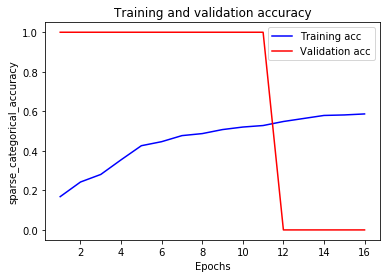

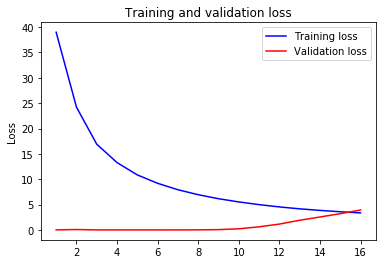

In [10]:
#     print(global_user.get_history_metrics())
    draw_graphs(users_all[7])


In [ ]:
with tf.device(DEVICE):
    averaging_methods = [Average.std_dev]
    # return a dictionary of users with data
    users_std_dev, global_user = init_users(df = df, 
                                        averaging_methods = averaging_methods, 
                                        seed = SEED)
    train_fed(users = users_std_dev, rounds = ROUNDS,
              epochs = EPOCHS,
              strat = "central",
              train_user_verbose = False,
              train_user_verbose_evaluate = False,
              train_user_verbose_fit = False,
              averaging_method =  Average.std_dev,
             averaging_post = True,
              averaging_metric = "accuracy")
    
    # return a dictionary of users with data
    users_std_dev_2, global_user = init_users(df = df, 
                                        averaging_methods = averaging_methods, 
                                        seed = SEED)
    train_fed(users = users_std_dev_2, rounds = ROUNDS,
              epochs = EPOCHS,
              strat = "personalised",
              train_user_verbose = False,
              train_user_verbose_evaluate = False,
              train_user_verbose_fit = False,
              averaging_post = True,
              averaging_metric = "accuracy")
    
    

In [ ]:
with tf.device(DEVICE):
    averaging_methods = [Average.weighted_avg]
    
    # return a dictionary of users with data
    users_weighted_avg, global_user = init_users(df = df, 
                                        averaging_methods = averaging_methods, 
                                        seed = SEED)
    train_fed(users = users_weighted_avg, rounds = ROUNDS,
              epochs = EPOCHS,
              strat = "central",
              train_user_verbose = False,
              train_user_verbose_evaluate = False,
              train_user_verbose_fit = False,
              averaging_method = Average.weighted_avg,
              averaging_post = True,
              averaging_metric = "accuracy")
    
    # return a dictionary of users with data
    users_weighted_avg_2, global_user = init_users(df = df, 
                                        averaging_methods = averaging_methods, 
                                        seed = SEED)
    train_fed(users = users_weighted_avg_2, rounds = ROUNDS,
              epochs = EPOCHS,
              strat = "personalised",
              train_user_verbose = False,
              train_user_verbose_evaluate = False,
              train_user_verbose_fit = False,
              averaging_post = True,
              averaging_metric = "accuracy")
    

All
For central
Final values for Pre-fit accuracy
Position                   Pre
Round                       15
Average               0.686152
Standard Deviation    0.176478
Minimum               0.368421
Maximum               0.953089
Name: 30, dtype: object
Final values for Post-fit accuracy
Position                  Post
Round                       15
Average               0.953377
Standard Deviation    0.108514
Minimum                0.59596
Maximum                      1
Name: 31, dtype: object



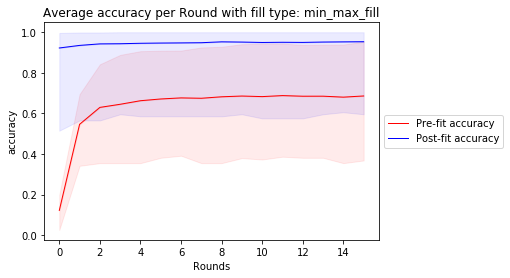

Final accuracy for Pre-fit data
   User  Final Value
1     0     0.719337
3     1     0.649364
5     2     0.658915
7     4     0.368421
9     5     0.381978
11    6     0.853881
13    7     0.474747
15    8     0.728540
17    9     0.738520
19   10     0.740992
21   11     0.919405
23   12     0.732785
25   13     0.953089
Averaged: 0.6861520294959729

Final accuracy for Post-fit data
   User  Final Value
0     0     0.984530
2     1     0.995763
4     2     0.987818
6     4     0.868421
8     5     0.992165
10    6     0.998858
12    7     0.595960
14    8     0.984593
16    9     0.996173
18   10     0.995822
20   11     0.993800
22   12     1.000000
24   13     1.000000
Averaged: 0.9533772468566895



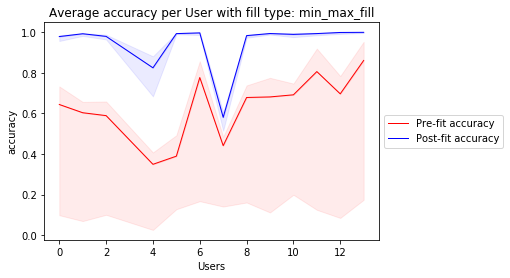

<Figure size 432x288 with 0 Axes>

In [9]:
ignore_first_n = 0
final_values = True



print("All")

# print("For p2p")


# df_avg_round_stats_acc = avg_round_stats(users_all_2, 
#                                          ignore_first_n = ignore_first_n, 
#                                          min_max_fill = True, 
#                                          metric = "accuracy",
#                                          final_values = final_values)
# df_avg_user_stats_acc = avg_user_stats(users_all_2, 
#                                        ignore_first_n = ignore_first_n, 
#                                        min_max_fill = True, 
#                                        metric = "accuracy",
#                                        final_values = final_values)
print("For central")


df_avg_round_stats_acc = avg_round_stats(users_all, 
                                         ignore_first_n = ignore_first_n, 
                                         min_max_fill = True, 
                                         metric = "accuracy",
                                         final_values = final_values)
df_avg_user_stats_acc = avg_user_stats(users_all, 
                                       ignore_first_n = ignore_first_n, 
                                       min_max_fill = True, 
                                       metric = "accuracy",
                                       final_values = final_values)

In [ ]:
ignore_first_n = 0
final_values = True

print("Std deviation")

print("For p2p")


df_avg_round_stats_acc = avg_round_stats(users_std_dev_2, 
                                         ignore_first_n = ignore_first_n, 
                                         min_max_fill = True, 
                                         metric = "accuracy",
                                         final_values = final_values)
df_avg_user_stats_acc = avg_user_stats(users_std_dev_2, 
                                       ignore_first_n = ignore_first_n, 
                                       min_max_fill = True, 
                                       metric = "accuracy",
                                       final_values = final_values)
print("For central")


df_avg_round_stats_acc = avg_round_stats(users_std_dev, 
                                         ignore_first_n = ignore_first_n, 
                                         min_max_fill = True, 
                                         metric = "accuracy",
                                         final_values = final_values)
df_avg_user_stats_acc = avg_user_stats(users_std_dev, 
                                       ignore_first_n = ignore_first_n, 
                                       min_max_fill = True, 
                                       metric = "accuracy",
                                       final_values = final_values)

print(users_std_dev[1].get_history_metrics())
draw_graphs(users_std_dev[1])

In [ ]:
ignore_first_n = 0
final_values = True

print("Weighted average")

print("For p2p")


df_avg_round_stats_acc = avg_round_stats(users_weighted_avg_2, 
                                         ignore_first_n = ignore_first_n, 
                                         min_max_fill = True, 
                                         metric = "accuracy",
                                         final_values = final_values)
df_avg_user_stats_acc = avg_user_stats(users_weighted_avg_2, 
                                       ignore_first_n = ignore_first_n, 
                                       min_max_fill = True, 
                                       metric = "accuracy",
                                       final_values = final_values)
print("For central")


df_avg_round_stats_acc = avg_round_stats(users_weighted_avg, 
                                         ignore_first_n = ignore_first_n, 
                                         min_max_fill = True, 
                                         metric = "accuracy",
                                         final_values = final_values)
df_avg_user_stats_acc = avg_user_stats(users_weighted_avg, 
                                       ignore_first_n = ignore_first_n, 
                                       min_max_fill = True, 
                                       metric = "accuracy",
                                       final_values = final_values)